In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
import time
import pickle

# Data collection / Gathering

In [2]:
data=pd.read_csv('insurance.csv')

# Understanding the data

In [3]:
data.shape

(1338, 7)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.duplicated().sum()

1

In [9]:
data.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


 # Exploratory Data Analysis (EDA)- Univariate Analysis

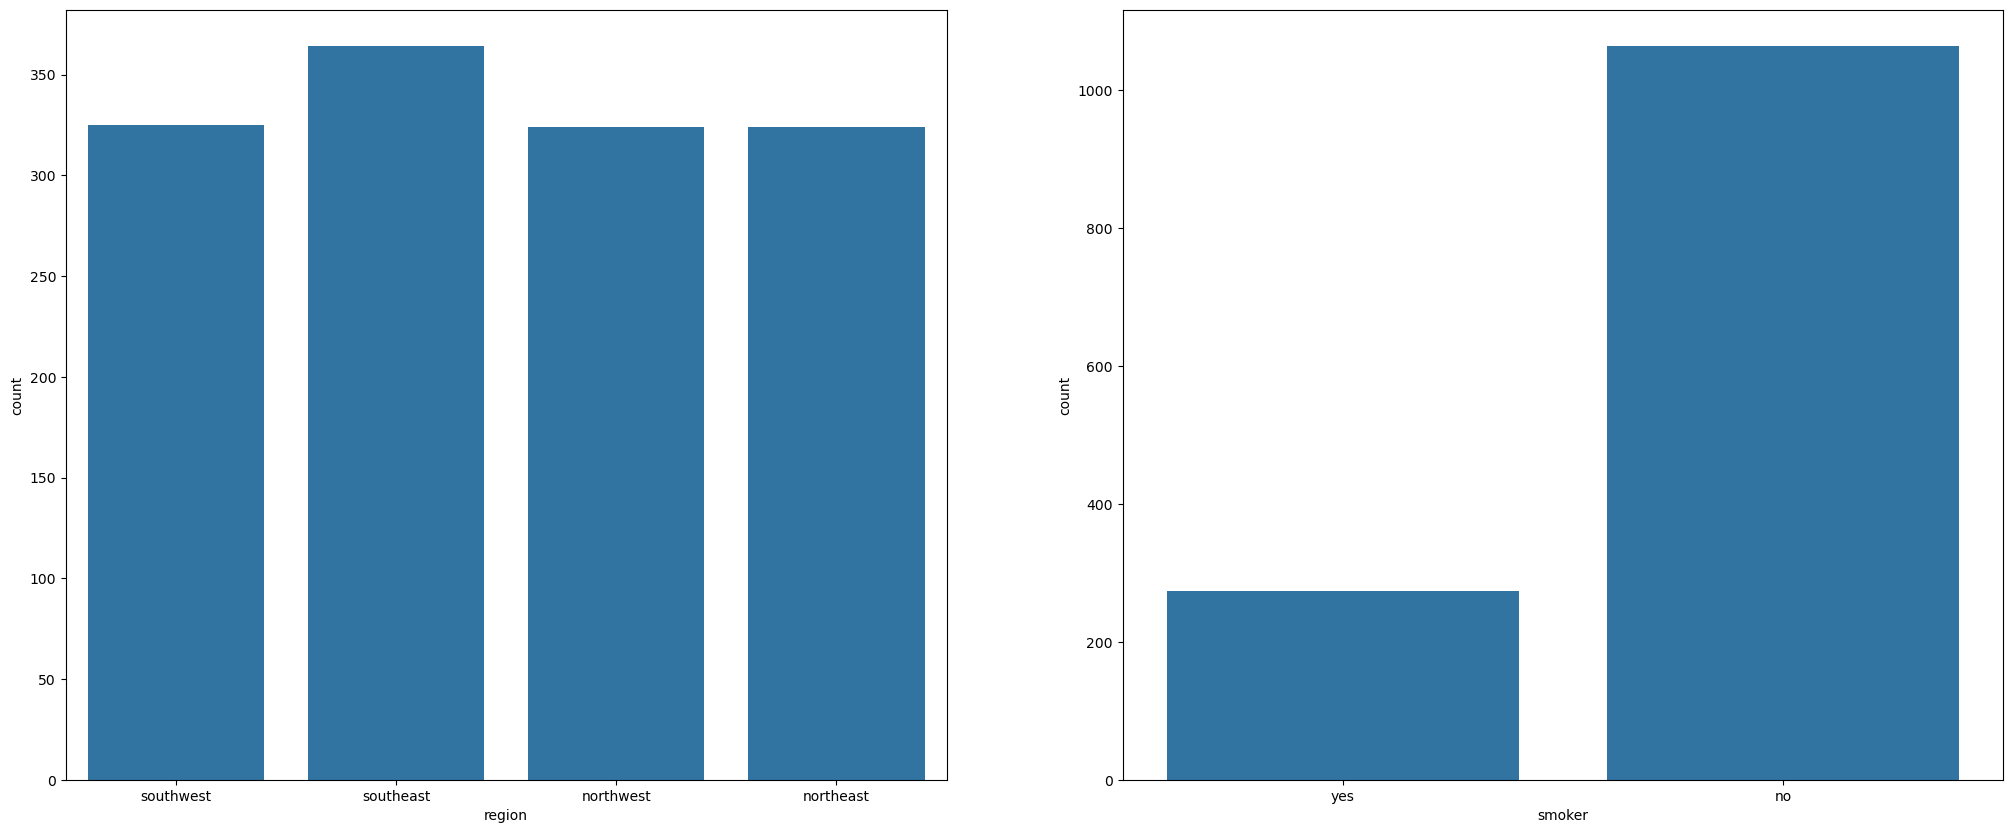

In [38]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
sns.countplot(x='region', data=data)    

plt.subplot(1,2,2)
sns.countplot(x='smoker', data=data)
plt.savefig('C:\\Users\\DELL\\Medical Price prediction\\region_smoker_plot.png')

plt.show()



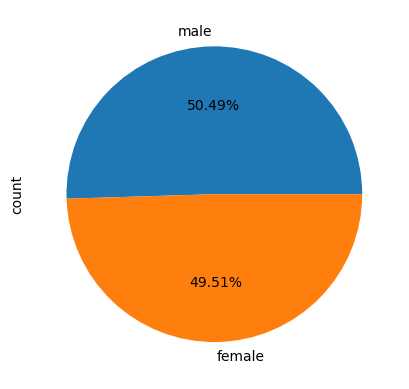

In [39]:
data['sex'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.savefig('C:\\Users\\DELL\\Medical Price prediction\\sex_plot.png')
plt.show()


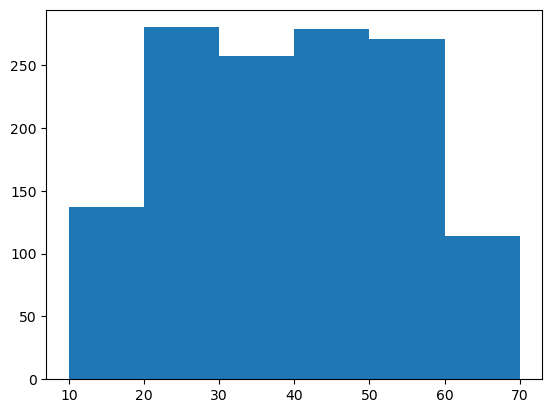

In [12]:
plt.hist(data['age'],bins=[10,20,30,40,50,60,70])
plt.show()

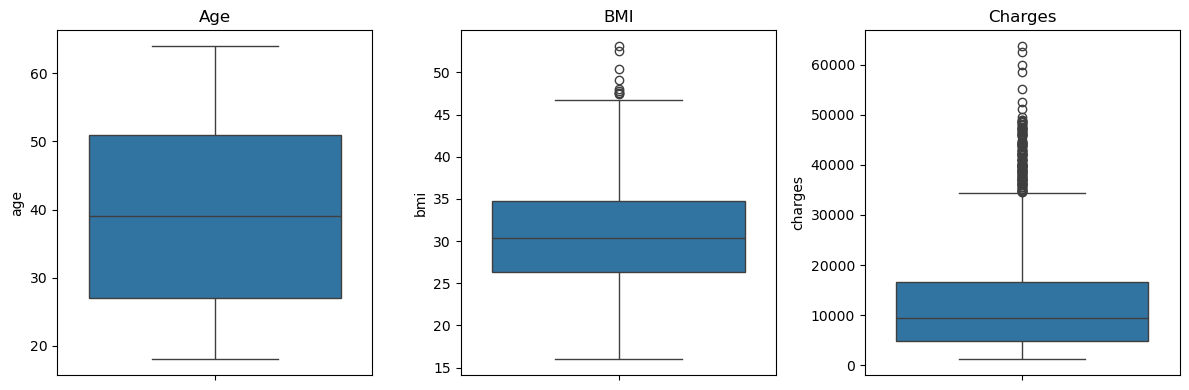

In [13]:
plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
sns.boxplot(y=data['age'])
plt.title('Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=data['bmi'])
plt.title('BMI')

plt.subplot(1, 3, 3)
sns.boxplot(y=data['charges'])
plt.title('Charges')

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15196\703496756.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15196\703496756.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


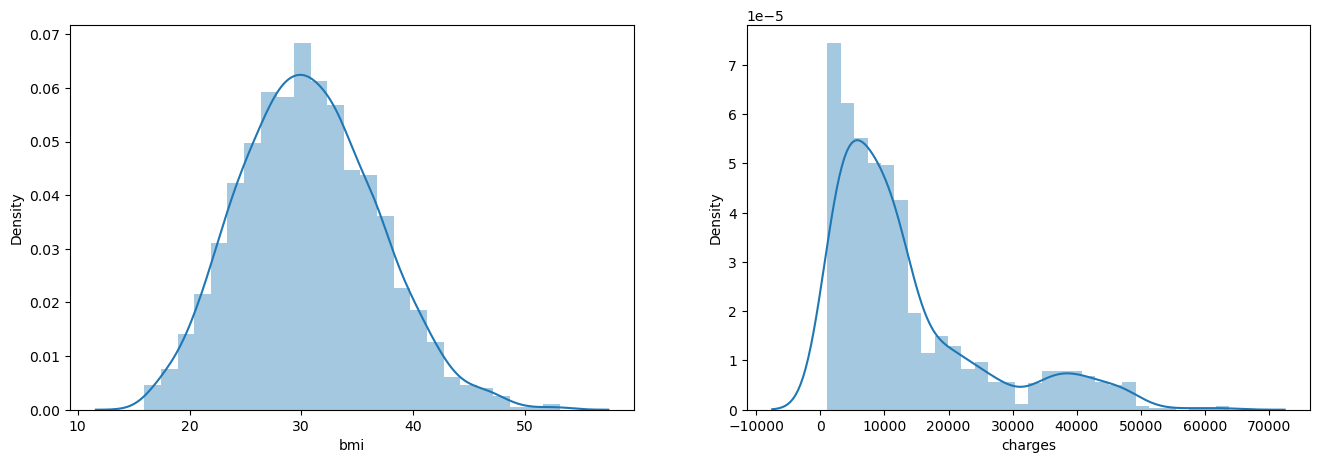

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['bmi'])

plt.subplot(1,2,2)
sns.distplot(data['charges'])

plt.show()

 # Exploratory Data Analysis (EDA)- Bivariate Analysis and Multivariate analysis

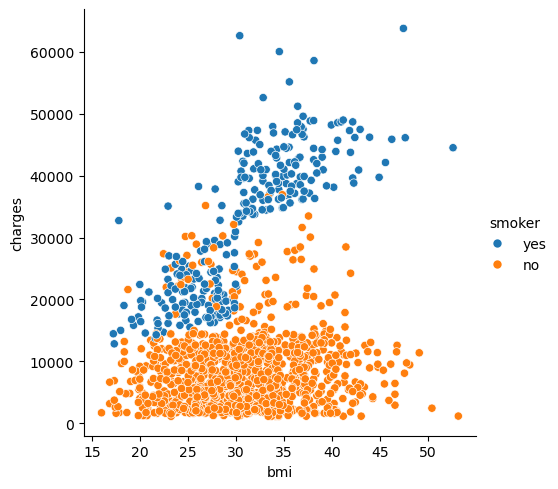

In [15]:
sns.relplot(x=data['bmi'], y=data['charges'],hue=data['smoker'])
plt.show()

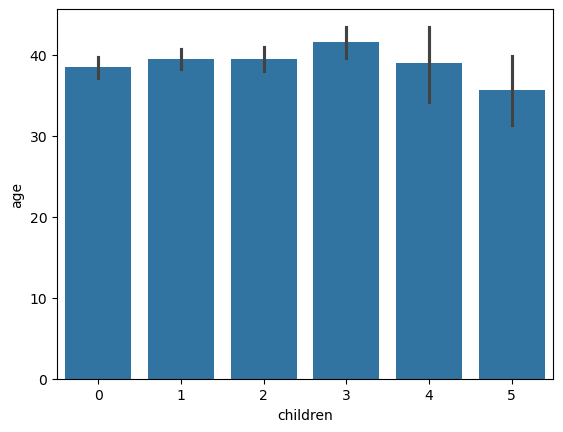

In [16]:
sns.barplot(x='children', y='age', data=data)
plt.show()

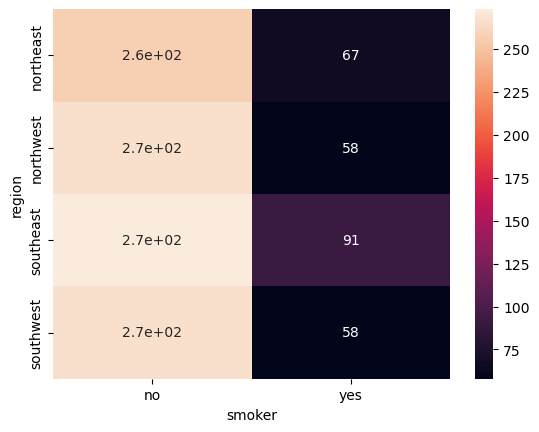

In [17]:
sns.heatmap(pd.crosstab(data['region'], data['smoker']), annot=True)
plt.show()

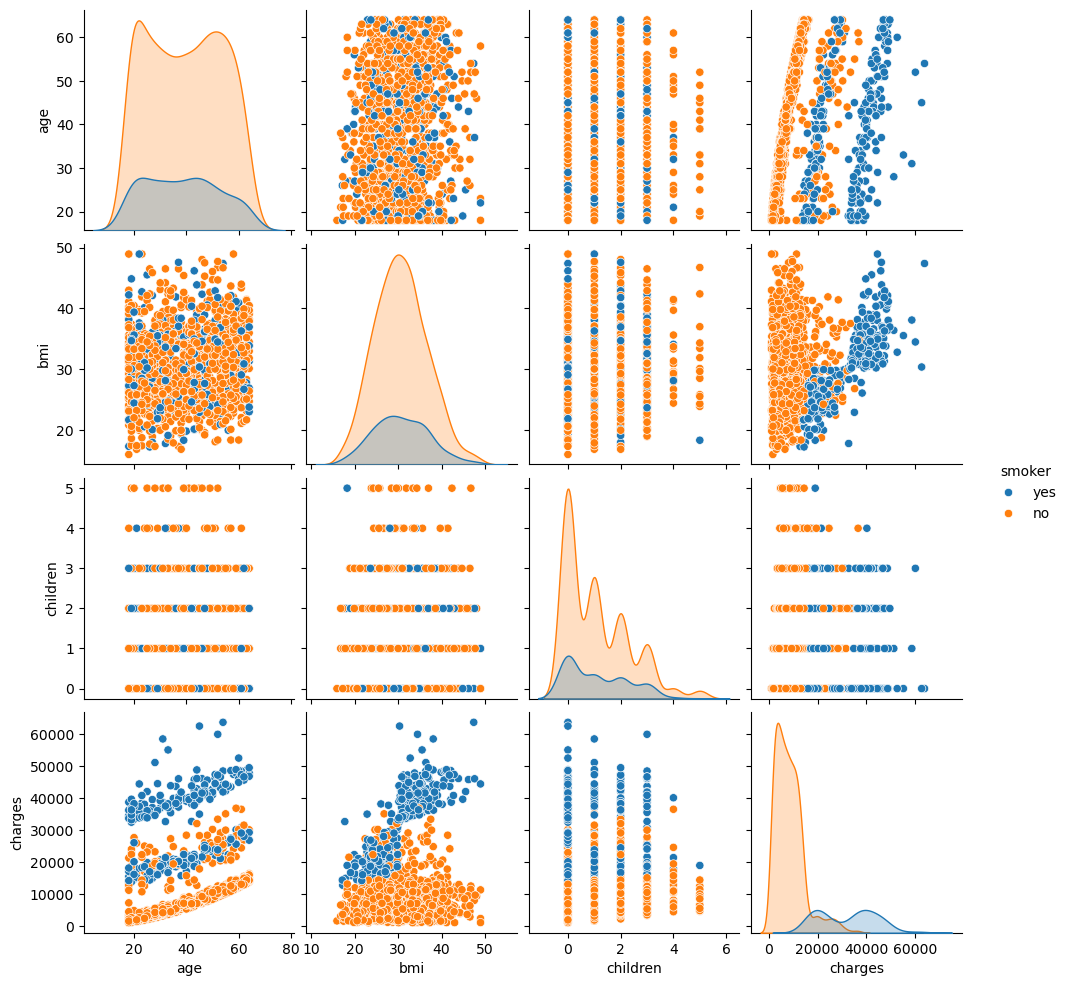

In [40]:
sns.pairplot(data, hue='smoker')
plt.savefig('C:\\Users\\DELL\\Medical Price prediction\\pairplot_plot.png')
plt.show()

# Data cleaning

In [19]:
data.drop_duplicates(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15196\4235751418.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


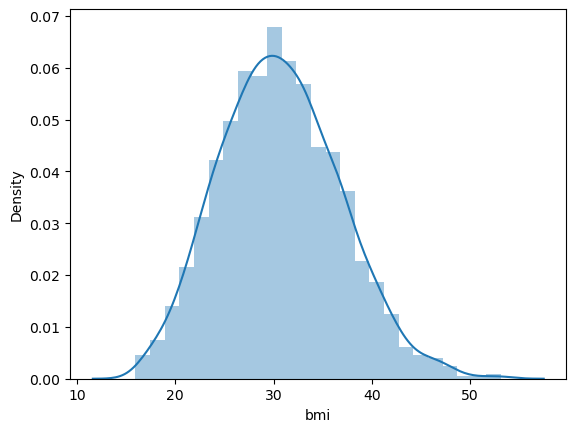

In [20]:
sns.distplot(data['bmi'])

plt.show()

In [21]:
data['bmi'].skew()

0.28391419385321137

In [22]:
# z-score
upper_limit=data['bmi'].mean()+3*data['bmi'].std()
lower_limit=data['bmi'].mean()-3*data['bmi'].std()

# capping
data['bmi']=np.where(
    data['bmi']>upper_limit,
    upper_limit,
    np.where(
        data['bmi']<lower_limit,
        lower_limit,
        data['bmi']
    )
)

# Train_test_Split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('charges',axis=1),data['charges'],test_size=0.2)
x_train

,age,sex,bmi,children,smoker,region
901,60,male,40.920,0,yes,southeast
594,41,male,40.260,0,no,southeast
681,19,male,20.300,0,no,southwest
1231,20,female,21.800,0,yes,southwest
431,29,female,20.235,2,no,northwest
...,...,...,...,...,...,...
569,48,male,40.565,2,yes,northwest
665,43,male,38.060,2,yes,southeast
1157,23,female,23.180,2,no,northwest
662,32,female,31.540,1,no,northeast


# Feature Engineering

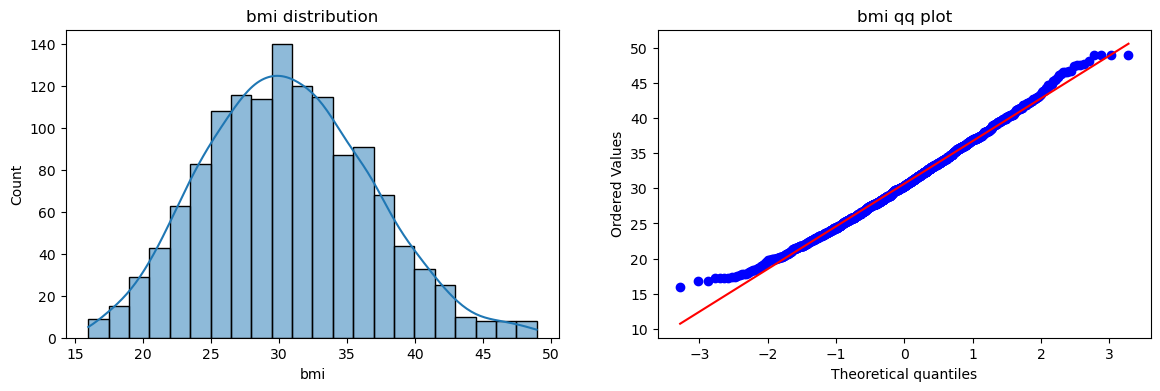

In [41]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(data['bmi'],kde=True)
plt.title('bmi distribution')
plt.subplot(122)
stats.probplot(data['bmi'], dist="norm", plot=plt)
plt.title('bmi qq plot')
plt.savefig('C:\\Users\\DELL\\Medical Price prediction\\pa_plot.png')
plt.show()

In [25]:
numeric_features = ['age','bmi','children']
categorical_features = ['sex','smoker','region']

In [26]:
preprocess = ColumnTransformer([
    ('log_bmi', FunctionTransformer(np.log1p), ['bmi']),
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')

# Pipeline

In [143]:
pipe = Pipeline([
    ('preprocess', preprocess),
    ('model', SGDRegressor( learning_rate='constant',eta0=0.003,max_iter=2500,penalty=None))
])


In [150]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_bmi',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['bmi']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model',
                 SGDRegressor(eta0=0.003, learning_rate='constant',
                              max_iter=2500, penalty=None))])

In [144]:
start=time.time()
pipe.fit(x_train,y_train)
print("time taken is:",time.time()-start)

time taken is: 0.012240171432495117


In [145]:
y_predict=pipe.predict(x_test)

In [146]:
y_predict

array([38930.05447546,  4787.34124634, 11256.07432712,  7757.41165756,
       13057.84206454, 27489.11767823,  6460.71503318, 13400.47339522,
       39579.87645495, 11710.20550746,  3117.93295628, 28077.12306538,
        4078.33369761,  6483.31340843, 34137.84511281, 32767.41732271,
       30988.04128491,  7264.47874661,  4536.81138768, 11361.83638612,
        6512.01885519, 11753.81896682, 11562.60715323, 13751.72351482,
       11452.26718801, 34797.75101426,  5135.5542846 , 14050.68840408,
       15262.10041868, 12052.9584304 , 31322.84226973,  8675.75948795,
        2871.58067308, 11847.48939473,  5084.63903634, 25327.23944782,
        7131.19977956, 14811.55595814, 26566.26708839, 14761.13535185,
       15383.22185791,  4557.8383815 ,  5511.95988903, 35444.43537759,
        4274.34195839, 37171.90877563, 10917.34835661,   618.37120755,
         999.96044341, 12475.02528018,  6358.17121665,  9297.50765349,
        3458.7881481 , 35158.60225769,  7836.39693107, 12442.93527748,
      

In [147]:
y_test

92      30184.93670
101      3645.08940
372      7639.41745
189      4922.91590
62      30166.61817
           ...     
1261     3277.16100
867     11576.13000
1074    13204.28565
967      7518.02535
434      4243.59005
Name: charges, Length: 268, dtype: float64

In [148]:
print("R² Score:", r2_score(y_test,y_predict))

R² Score: 0.7351675074847973


In [149]:
pickle.dump(pipe,open('pipe.pkl','wb'))